<img src="https://admissions.ntust.edu.tw/front_index/images/logo.png" alt="drawing" width="600"/>
<h1><center>MACHINE LEARNING : HOMEWORK 1</center></h1>
<h1><center>Data 2 : Authors prediction</center></h1>
<h2>Hector LANDES - M10601810</h2>
<h2>Machine Learning - CS5087701</h2>

<h1><font color="red">How to DT with text? Maybe attribnutes for each word, sum up, if word lest that 1 or 2 times then delate then use </font></h1>
package nltk regarder kaggle discssion and note book

Creates class of special characaters, row 1 have 3 special caracters so value of special cahracters will be 3

 Determne importance of attributes with F1-socre and plot it?
 
 https://www.kaggle.com/sudalairajkumar/simple-feature-engg-notebook-spooky-author

<li>Source</li>
https://www.kaggle.com/sudalairajkumar/simple-feature-engg-notebook-spooky-author

<hr>
<div id="Import the libraries">
    <h2>Import the libraries</h2>
</div>

In [1]:
#!conda install -c conda-forge pydotplus -y
#pip install graphviz
#pip install pydotplus
#pip install chart_studio
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pydotplus as py
from sklearn.externals.six import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.image as mpimg
import string
import seaborn as sns
from sklearn import tree
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Hector Landes\graphviz-2.38\release\bin'
%matplotlib inline 

<hr>
<div id="Import the data">
    <h2>Import the data</h2>
</div>

In [2]:
test = pd.read_csv (r'C:\Users\Hector Landes\Desktop\Data Science Projects\20191005 Homework_1_ML\2. Prepared Data\test.csv')
train = pd.read_csv (r'C:\Users\Hector Landes\Desktop\Data Science Projects\20191005 Homework_1_ML\2. Prepared Data\train.csv')

<hr>
<div id="Data checking">
    <h2>Data checking</h2>
</div>

In [3]:
train.describe()

,id,text,author
count,19579,19579,19579
unique,19579,19579,3
top,id07795,The traces of light wheels were evident; and a...,EAP
freq,1,1,7900


In [4]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [5]:
test.describe()

,id,text
count,8392,8392
unique,8392,8392
top,id20974,My eldest brother had a son eighteen years old...
freq,1,1


In [6]:
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


<hr>
<div id=" Data preprocessing">
    <h2> Data preprocessing</h2>
</div>

In [7]:
import nltk
from nltk import word_tokenize, pos_tag, pos_tag_sents
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

Check if any missing values

In [16]:
train.isnull().values.any()

False

In [14]:
test.isnull().values.any()

False

Let's check if classes are well balanced

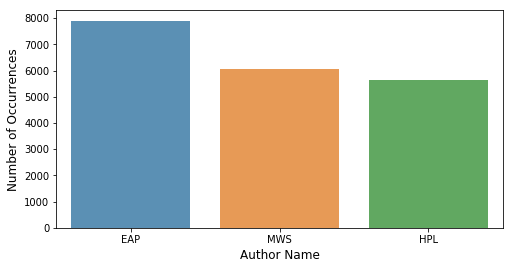

In [19]:
cnt_srs = train['author'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

In [140]:
import chart_studio.plotly as py
import plotly.graph_objects as go

In [144]:
all_words = train['text'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

<h3><li><b>Meta-features</b></li></h3>
Features extraced from the text (lenght of the sentences, number of spcial characters, punctions)

Number of words in the text

In [22]:
train["num_words"] = train["text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["text"].apply(lambda x: len(str(x).split()))

Number of unique words in the text

In [23]:
train["num_unique_words"] = train["text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["text"].apply(lambda x: len(set(str(x).split())))

Number of characters in the text

In [24]:
train["num_chars"] = train["text"].apply(lambda x: len(str(x)))
test["num_chars"] = test["text"].apply(lambda x: len(str(x)))

Number of stopwords

In [36]:
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

In [38]:
train["num_stopwords"] = train["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
test["num_stopwords"] = test["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

NameError: name 'eng_stopwords' is not defined

Number of punctuations

In [40]:
train["num_punctuations"] =train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test["num_punctuations"] =test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

Number of upper case words

In [27]:
train["num_words_upper"] = train["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
test["num_words_upper"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

Number of title case words

In [28]:
train["num_words_title"] = train["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
test["num_words_title"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

Average length of the words

In [29]:
train["mean_word_len"] = train["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test["mean_word_len"] = test["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [41]:
train.head()

,id,text,author,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len,num_punctuations
0,id26305,"This process, however, afforded me no means of...",EAP,41,35,231,2,3,4.658537,7
1,id17569,It never once occurred to me that the fumbling...,HPL,14,14,71,0,1,4.142857,1
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,36,32,200,0,1,4.583333,5
3,id27763,How lovely is spring As we looked from Windsor...,MWS,34,32,206,0,4,5.088235,4
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,27,25,174,0,2,5.481481,4


<h3><li><b>Text based features</b></li></h3>
Features like word frequency, standard deviation

Creaate tf-idf vectors. tf-idf is a weighting scheme that assigns each term in a document a weight based on its term frequency (tf) and inverse document frequency (idf). The terms with higher weight scores are considered to be more important.

In [50]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
full_tfidf = tfidf_vec.fit_transform(train['text'].values.tolist() + test['text'].values.tolist())
train_tfidf = tfidf_vec.transform(train['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test['text'].values.tolist())

HOW TO USE IT?

<h3><li><b>Label encoding</b></li></h3>

In [51]:
from sklearn.preprocessing import LabelEncoder

In [54]:
train['label_author'] = LabelEncoder().fit_transform(train['author'])

<ul>
<b> X </b> as the <b> Feature Matrix </b> 
</ul>

In [65]:
X = train[train.columns[3:9]]
X[0:2]

,num_words,num_unique_words,num_chars,num_words_upper,num_words_title,mean_word_len
0,41,35,231,2,3,4.658537
1,14,14,71,0,1,4.142857


<ul>
    <li> <b> Y </b> as the <b> Target Value </b> </li>
</ul>

In [66]:
Y = train['label_author']
Y[0:5]

0    0
1    1
2    0
3    2
4    1
Name: label_author, dtype: int32

Now we will split the data in training and testing data

In [67]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.2, random_state=3)

In [68]:
print('Feature matrix ->   Training:',X_trainset.shape,'   Testing:',X_testset.shape)
print('Target value   ->   Training:',Y_trainset.shape,'      Testing:',Y_testset.shape)

Feature matrix ->   Training: (15663, 6)    Testing: (3916, 6)
Target value   ->   Training: (15663,)       Testing: (3916,)


<hr>
<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>richTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

<h3>Double Cross-validation for different tree dept and minimum node size</h3>

In [72]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection

In [75]:
avg_test_accuracy = []
maximum_dept = []
minimum_node_size = []

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = model_selection.KFold(n_splits=5, random_state=42)
for max_depth in range(2, 20):
    for min_node_size in range(5, 30, 5):
        richTree = DecisionTreeClassifier(criterion='entropy', 
                                          max_depth=max_depth,
                                          min_samples_leaf=min_node_size)
        results = model_selection.cross_validate(estimator=richTree,
                                                 X=X_trainset,
                                                 y=Y_trainset,
                                                 cv=kfold,
                                                 scoring=scoring)
        avg_test_accuracy.append(results['test_accuracy'].mean())
        maximum_dept.append(max_depth)
        minimum_node_size.append(min_node_size)

        print("max_dept = {}, min_node_size = {}, accuracy={}, precision = {}, recall = {}, f1-score = {}".format(
            max_depth, 
            min_node_size,
            results['test_accuracy'].mean(),
            results['test_precision'].mean(),
            results['test_recall'].mean(),
            results['test_f1_score'].mean()))

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

In [ ]:
X = minimum_node_size
Y = maximum_dept
Z = avg_test_accuracy

plotx,ploty, = np.meshgrid(np.linspace(np.min(X),np.max(X),100),\
                           np.linspace(np.min(Y),np.max(Y),50))
plotz = interp.griddata((X,Y),Z,(plotx,ploty),method='linear')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plotx,ploty,plotz,cstride=1,rstride=1,cmap='OrRd')
ax.set_ylabel('Max dept')
ax.set_xlabel('Minimum node size')
ax.set_zlabel('Accuracy')
plt.rcParams['figure.figsize'] = (10,9)
plt.rcParams['font.size'] = 10
ax.set_title('Accuracy evolution with different min node size and max dept')
ax.view_init(30, 140)

In [ ]:
avg_test_accuracy.sort()
avg_test_accuracy[-5:]

In [76]:
richTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9, min_samples_leaf = 20)
richTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> Y_trainset </b>

In [77]:
richTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [78]:
predTree = richTree.predict(X_testset)

In [79]:
print (predTree [0:5])
print (Y_testset [0:5])

[2 0 0 2 1]
2419     0
2171     0
15027    2
10254    2
12169    2
Name: label_author, dtype: int32


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
</div>

In [80]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.4244126659856997


<h3>Confusion Matrix</h3>

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.66 0.14 0.2 ]
 [0.53 0.25 0.21]
 [0.57 0.16 0.26]]


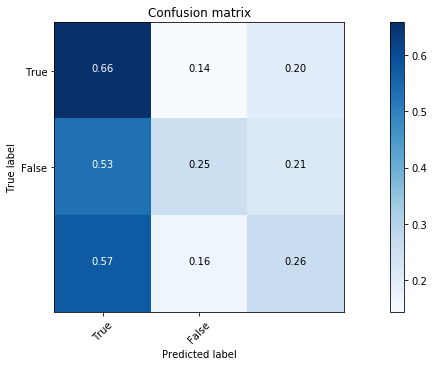

In [120]:
cnf_matrix = confusion_matrix(Y_testset, predTree)
np.set_printoptions(precision=2)
plt.figure()
plt.rcParams['figure.figsize'] = (13,5)
plot_confusion_matrix(cnf_matrix, classes=['True','False'],normalize= True,  title='Confusion matrix')

In [121]:
report = classification_report(Y_testset, predTree)
print(report)

              precision    recall  f1-score   support

           0       0.46      0.66      0.54      1624
           1       0.40      0.25      0.31      1103
           2       0.36      0.26      0.30      1189

   micro avg       0.42      0.42      0.42      3916
   macro avg       0.40      0.39      0.38      3916
weighted avg       0.41      0.42      0.40      3916



<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

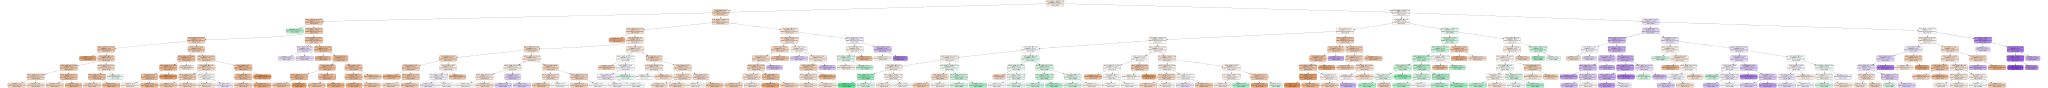

In [127]:
dot_data = tree.export_graphviz(richTree, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(X_trainset), class_names=['EAP', 'MWS', 'HPL'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [113]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [61]:
df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
df['text_lemmatized'] = df.text.apply(lemmatize_text)

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\Hector Landes/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Hector Landes\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [62]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()

In [63]:
# Defining a module for Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [64]:
text_process(train)

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\Hector Landes/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Hector Landes\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


Tokenize the text

In [8]:
test['tokenlized_text'] = test.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [9]:
test.head()

,id,text,tokenlized_text
0,id02310,"Still, as I urged our leaving Ireland with suc...","[Still, ,, as, I, urged, our, leaving, Ireland..."
1,id24541,"If a fire wanted fanning, it could readily be ...","[If, a, fire, wanted, fanning, ,, it, could, r..."
2,id00134,And when they had broken down the frail door t...,"[And, when, they, had, broken, down, the, frai..."
3,id27757,While I was thinking how I should possibly man...,"[While, I, was, thinking, how, I, should, poss..."
4,id04081,I am not sure to what limit his knowledge may ...,"[I, am, not, sure, to, what, limit, his, knowl..."


ModuleNotFoundError: No module named 'tidytext'

https://www.kaggle.com/c/spooky-author-identification/discussion/44003
https://github.com/selimamrouni/spooky-authors-identification/blob/master/spooky_project_cleaned.ipynb
https://viviandocuments.xyz/blog/Spooky-Author-Identification.html
https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial

In [19]:
X = train[train.columns[1:2]].values
X[0:5]

array([['This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'],
       ['It never once occurred to me that the fumbling might be a mere mistake.'],
       ['In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.'],
       ['How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.'],
       ['Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.']],
      dtype=object)

In [20]:
Y = train[train.columns[2:3]].values
Y[0:5]

array([['EAP'],
       ['HPL'],
       ['EAP'],
       ['MWS'],
       ['HPL']], dtype=object)

In [23]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

In [24]:
richTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
richTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
richTree.fit(X_trainset,Y_trainset)

ValueError: could not convert string to float: "The eulogies of Mr. Crab, such was the editor's name, were, however, by no means fulsomely indiscriminate."